# Logistic Regression, LDA, QDA, and KNN


## 📈 주식 시장 데이터
이번 실습에서는 ISLP 라이브러리에 포함되어 있는 Smarket 데이터셋을 분석해보겠습니다.
이 데이터는 2001년 초부터 2005년 말까지 1,250일간의 S&P 500 주가지수 수익률(%) 정보를 담고 있습니다.

각 날짜에 대해 다음과 같은 변수들이 포함되어 있습니다:

Lag1 ~ Lag5: 해당 날짜 이전 1~5일간의 수익률(%)

Volume: 전일 거래량 (십억 단위)

Today: 해당 날짜의 수익률(%)

Direction: 해당 날짜에 시장이 상승(Up)했는지 하락(Down)했는지 여부

In [5]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.8 MB/s eta 0:00:00
 

In [6]:
# 기본 라이브러리
import numpy as np                      # 수치 계산을 위한 넘파이
import pandas as pd                     # 데이터프레임 처리용 판다스
from matplotlib.pyplot import subplots  # 시각화용 서브플롯
import statsmodels.api as sm           # 통계 모델링 패키지
from ISLP import load_data             # ISLP 데이터셋 로딩 함수
from ISLP.models import (ModelSpec as MS, summarize)  # 모델 스펙 및 요약 함수

# ISLP 관련 추가 도구
from ISLP import confusion_table       # 혼동 행렬
from ISLP.models import contrast       # 범주형 변수 대비 설정

# sklearn에서 다양한 분류기 및 전처리 도구
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis as LDA,              # 선형 판별 분석
    QuadraticDiscriminantAnalysis as QDA            # 이차 판별 분석
)
from sklearn.naive_bayes import GaussianNB          # 나이브 베이즈 분류기
from sklearn.neighbors import KNeighborsClassifier  # K-최근접 이웃
from sklearn.preprocessing import StandardScaler    # 데이터 표준화
from sklearn.model_selection import train_test_split # 학습/검증 세트 분리
from sklearn.linear_model import LogisticRegression  # 로지스틱 회귀


Now we are ready to load the `Smarket` data.

In [8]:
# Smarket 데이터셋 로딩
Smarket = load_data('Smarket')
Smarket  # 데이터 출력

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


This gives a truncated listing of the data.
We can see what the variable names are.

In [9]:
# 변수명 확인
Smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [10]:
# 수치형 변수 간 상관계수 확인 (범주형은 제외)
Smarket.corr(numeric_only=True)


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


Lag1~Lag5와 Today 간의 상관관계는 거의 0에 가까우며,
Year와 Volume 간에는 유의미한 양의 상관관계가 있습니다.

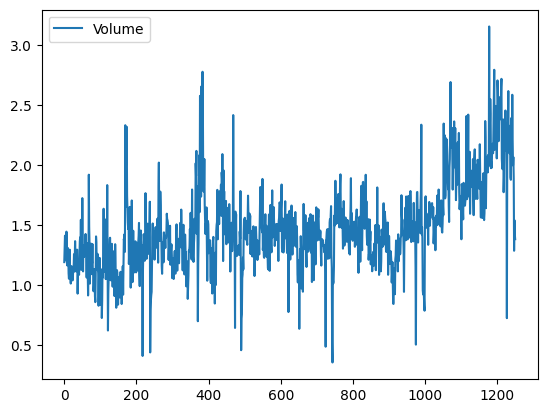

In [13]:
# Volume의 시간에 따른 변화 시각화
Smarket.plot(y='Volume');

## Logistic Regression
Lag1부터 Lag5까지의 수익률과 Volume(거래량)을 이용하여
주가가 상승(Up)할지 하락(Down)할지를 예측하는 로지스틱 회귀 모델을 적합해보겠습니다.

로지스틱 회귀는 **일반화 선형 모델(Generalized Linear Model)**의 한 종류이며,
statsmodels 패키지의 sm.GLM() 함수를 사용하여 일반화 선형 모델을 학습할 수 있습니다.
또는 sm.Logit() 함수를 사용하여 로지스틱 회귀만을 직접적으로 적합할 수도 있습니다.

sm.GLM() 함수는 sm.OLS() (선형 회귀 함수)와 사용법이 비슷하지만,
이항 로지스틱 회귀임을 명시하기 위해 다음과 같은 인자를 추가로 지정해야 합니다:

In [14]:
# 설명 변수 지정
allvars = Smarket.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)

# 입력 변수(X)와 목표 변수(y) 구성
X = design.fit_transform(Smarket)
y = Smarket.Direction == 'Up'  # 상승 여부 (True/False)

# 로지스틱 회귀 모델 적합
glm = sm.GLM(y, X, family=sm.families.Binomial())
results = glm.fit()
summarize(results)  # 회귀 결과 요약

,coef,std err,z,P>|z|
intercept,-0.1260,0.241,-0.523,0.601
Lag1,-0.0731,0.050,-1.457,0.145
Lag2,-0.0423,0.050,-0.845,0.398
Lag3,0.0111,0.050,0.222,0.824
Lag4,0.0094,0.050,0.187,0.851
Lag5,0.0103,0.050,0.208,0.835
Volume,0.1354,0.158,0.855,0.392


가장 작은 p-값은 Lag1 변수와 관련되어 있습니다.
이 변수의 회귀 계수는 음수이기 때문에,
어제 수익률이 양(+)이었다면, 오늘 주가는 상승할 가능성이 낮아진다는 해석이 가능합니다.

하지만 이 p-값이 0.15로 상대적으로 크기 때문에,
Lag1과 Direction 간에 실제로 유의미한 연관성이 있다고 보기는 어렵습니다.

results 객체의 params 속성을 사용하면,
학습된 회귀 모델의 계수만 따로 확인할 수 있습니다.

In [15]:
results.params

,0
intercept,-0.126000
Lag1,-0.073074
Lag2,-0.042301
Lag3,0.011085
Lag4,0.009359
Lag5,0.010313
Volume,0.135441


마찬가지로, results 객체의 pvalues 속성을 사용하면
각 회귀 계수에 대한 p-값을 확인할 수 있습니다.



In [16]:
results.pvalues

,0
intercept,0.600700
Lag1,0.145232
Lag2,0.398352
Lag3,0.824334
Lag4,0.851445
Lag5,0.834998
Volume,0.392404


results 객체의 predict() 메서드를 사용하면
설명 변수의 값을 바탕으로 시장이 상승할 확률을 예측할 수 있습니다.
이 함수는 **확률값(0~1)**으로 결과를 반환합니다.

predict() 함수에 별도의 데이터를 전달하지 않으면,
모델을 학습할 때 사용한 훈련 데이터에 대한 예측 확률이 반환됩니다.

선형 회귀와 마찬가지로, 원하는 경우 exog 인자를 통해
디자인 행렬(입력 변수)을 직접 지정할 수도 있습니다.

In [17]:
probs = results.predict()
probs[:10] # 예시


array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

특정 날짜에 시장이 상승할지(Up) 하락할지(Down) 예측하려면,
예측된 확률값을 범주형(class) 라벨로 변환해야 합니다.

아래 두 줄의 코드는
예측 확률이 0.5보다 큰지 작은지를 기준으로
Up 또는 Down 라벨을 부여한 예측 벡터를 생성합니다.

In [18]:
labels = np.array(['Down']*1250)
labels[probs>0.5] = "Up"


ISLP 패키지의 confusion_table() 함수는
**예측 결과 요약표(혼동 행렬, confusion matrix)**를 출력해 줍니다.

이를 통해 얼마나 많은 관측값이 올바르게 또는 잘못 분류되었는지 확인할 수 있습니다.

이 함수는 sklearn.metrics의 혼동 행렬 기능을 참고하여 작성되었으며,
행/열 이름이 포함된 형태로 결과 행렬을 전치(transpose)하여 보여줍니다.

첫 번째 인자: 예측된 클래스 라벨

두 번째 인자: 실제 클래스 라벨

In [19]:
confusion_table(labels, Smarket.Direction) # 예측 클래스 라벨, 실제 클래스 라벨


Truth,Down,Up
Predicted,,
Down,145,141
Up,457,507


혼동 행렬(confusion matrix)의 **대각 원소(diagonal)**는
모델이 정확히 예측한 경우,
비대각 원소(off-diagonal)는 잘못 예측한 경우를 나타냅니다.

예를 들어, 모델이 시장 상승(Up)을 507일,
시장 하락(Down)을 145일 정확히 예측하여
총 507 + 145 = 652일 동안 올바른 예측을 한 것으로 확인됩니다.

np.mean() 함수를 사용하면,
전체 예측 중 얼마나 정확했는지를 비율로 계산할 수 있습니다.

이 경우, 로지스틱 회귀는 시장 움직임을 약 52.2% 정확도로 예측한 것입니다.

In [21]:
print((507+145)/1250)
print(np.mean(labels == Smarket.Direction))


0.5216
0.5216


처음 보기에는 로지스틱 회귀 모델이 **무작위 추측(random guessing)**보다
조금 더 나은 성능을 보이는 것처럼 보입니다.

하지만 이 결과는 오해의 소지가 있습니다.
왜냐하면 모델을 학습과 평가 모두 동일한 1,250개의 데이터로 수행했기 때문입니다.

즉,
100
−
52.2
=
47.8
%
100−52.2=47.8%
은 **훈련 데이터에 대한 오류율(training error rate)**이며,
이 값은 일반적으로 낙관적인 편향을 갖고 있어
실제 예측 성능(테스트 성능)을 과소평가하게 됩니다.

실제로 사용할 모델의 정확도를 더 현실적으로 평가하기 위해서는,   
데이터의 일부만 사용해서 모델을 학습하고,
남은 데이터를 테스트용(검증용)으로 따로 평가하는 것이 좋습니다.

이런 방식은 실제로도 유효한데,
우리가 관심 있는 것은 이미 알고 있는 과거 데이터에 대한 성능이 아니라,
앞으로 시장이 어떻게 움직일지를 예측하는 능력이기 때문입니다.

먼저 2001년부터 2004년까지의 관측치에 해당하는 불리언 벡터를 생성하고,
이를 이용해 2005년의 관측치만 포함하는 테스트 데이터셋을 따로 분리합니다.

In [22]:
train = (Smarket.Year < 2005)
Smarket_train = Smarket.loc[train]
Smarket_test = Smarket.loc[~train]
Smarket_test.shape


(252, 9)

In [23]:
train

,Year
0,True
1,True
2,True
3,True
4,True
...,...
1245,False
1246,False
1247,False
1248,False


train 객체는 총 1,250개의 요소를 가진 벡터로,
**데이터셋의 각 관측치(날짜)에 대한 불리언 값(True/False)**을 담고 있습니다.

2005년 이전에 해당하는 관측치에는 True

2005년 해당하는 관측치에는 False가 할당되어 있습니다.

따라서 train은 **불리언 배열(Boolean array)**입니다.
불리언 배열은 DataFrame.loc 메서드와 함께 사용하여
특정 조건을 만족하는 행만 추출할 수 있습니다.


In [24]:
# 2005년 이전의 데이터만 사용하여 로지스틱 회귀 모델을 학습한 후,
# 2005년 날짜들에 대해 시장 상승 확률을 예측해 보겠습니다.

In [25]:
# 학습용(X_train, y_train)과 테스트용(X_test, y_test) 데이터 분리
X_train, X_test = X.loc[train], X.loc[~train]  # 입력 변수
y_train, y_test = y.loc[train], y.loc[~train]  # 목표 변수 (Direction이 'Up'인지 여부)

# 학습 데이터를 이용한 로지스틱 회귀 모델 학습
glm_train = sm.GLM(y_train,                # 종속 변수 (Up 여부)
                   X_train,                # 독립 변수들 (Lag1~Lag5, Volume)
                   family=sm.families.Binomial())  # 이항 로지스틱 회귀 설정

# 모델 학습
results = glm_train.fit()

# 테스트 데이터에 대한 예측 확률 계산
probs = results.predict(exog=X_test)  # 2005년 데이터에 대한 상승 확률 예측


이제 우리는 훈련 데이터와 테스트 데이터를
완전히 분리된 두 개의 집합으로 나누어 모델을 학습하고 평가했습니다.

훈련(training): 2005년 이전 날짜의 데이터만 사용

테스트(testing): 2005년 해당 날짜의 데이터만 사용

이제 2005년에 대한 예측 결과를 실제 **시장 움직임(Direction)**과 비교해보겠습니다.
우선, 실제 라벨(Up 또는 Down)을 담은 훈련용/테스트용 라벨 벡터를 따로 저장해두겠습니다.
(참고로 y_test는 True/False로 구성된 이진형 벡터입니다.)

In [26]:
D = Smarket.Direction
L_train, L_test = D.loc[train], D.loc[~train]


이제 모델이 예측한 확률 값을 기준으로,
**0.5(50%)를 임계값(threshold)**으로 설정하여
최종적으로 Up 또는 Down으로 된 예측 라벨을 생성합니다.

In [27]:
labels = np.array(['Down']*252)
labels[probs>0.5] = 'Up'
confusion_table(labels, L_test)


Truth,Down,Up
Predicted,,
Down,77,97
Up,34,44


모델의 **테스트 정확도(test accuracy)**는 약 48%,
반면 **오차율(error rate)**은 약 **52%**입니다.

In [29]:
print(np.mean(labels == L_test))  # 정확도 (예측이 맞은 비율)
print(np.mean(labels != L_test))    # 오차율 (예측이 틀린 비율)


0.4801587301587302
0.5198412698412699


이전에 확인했듯이, 로지스틱 회귀 모델에서 대부분의 설명 변수들은
유의미하지 않은 (p-값이 큰) 결과를 보였습니다.
그중 가장 p-값이 작았던 변수는 Lag1이었지만,
그마저도 통계적으로 충분히 작다고 보긴 어려웠습니다.

따라서 Direction을 예측하는 데 도움이 되지 않는 변수들을 제거하면,
오히려 더 효율적인 모델을 만들 수 있을지도 모릅니다.

일반적으로 반응 변수와 관련 없는 설명 변수를 사용할 경우,
편향은 줄어들지 않고 분산만 증가하기 때문에
오히려 테스트 오차율이 악화되는 경향이 있습니다.
이런 변수들을 제거하면 테스트 성능이 향상될 수 있습니다.

이에 따라 아래에서는 예측력이 상대적으로 높아 보였던 Lag1과 Lag2만을 사용하여
로지스틱 회귀 모델을 다시 적합해보겠습니다.

In [30]:
model = MS(['Lag1', 'Lag2']).fit(Smarket)
X = model.transform(Smarket)
X_train, X_test = X.loc[train], X.loc[~train]
glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)
labels = np.array(['Down']*252)
labels[probs>0.5] = 'Up'
confusion_table(labels, L_test)


Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


이제 모델의 전체 정확도와 함께,
로지스틱 회귀가 "상승(Up)"을 예측한 날들에 대한 정확도도 함께 평가해보겠습니다.

즉, 모델이 시장 상승을 예측한 날에 실제로 시장이 상승했는지를 확인합니다.

In [31]:
(35+106)/252,106/(106+76)


(0.5595238095238095, 0.5824175824175825)

전체적으로 약 56%의 일일 시장 움직임을 정확히 예측했습니다.

하지만 주의할 점은,
매일 시장이 상승한다고 단순히 예측하는 전략도
정확도가 **마찬가지로 56%**라는 것입니다.

즉, 전체 오차율 관점에서는 로지스틱 회귀도 단순 전략과 성능 차이가 없습니다.

다만, 혼동 행렬을 보면
로지스틱 회귀가 상승(Up)을 예측한 날에 실제로 시장이 상승할 확률은 **58%**입니다.

이는 "모델이 상승을 예측한 날에만 매수하고, 그렇지 않은 날은 거래하지 않는"
단순한 트레이딩 전략을 고려해볼 수 있음을 시사합니다.

물론, 이와 같은 미세한 성능 향상이 우연인지 또는 실제로 유의미한 것인지는
더 정밀한 분석이 필요합니다.

이번에는 특정한 Lag1과 Lag2 값을 입력했을 때
해당 날의 시장 방향(Direction)을 예측해보겠습니다.

예를 들어 다음과 같은 두 경우를 고려합니다:

Lag1 = 1.2, Lag2 = 1.1

Lag1 = 1.5, Lag2 = -0.8

이러한 예측은 predict() 함수를 통해 수행할 수 있습니다.



In [34]:
# 새롭게 예측할 Lag1, Lag2 값들로 이루어진 데이터프레임 생성
newdata = pd.DataFrame({'Lag1': [1.2, 1.5],
                        'Lag2': [1.1, -0.8]})

# 기존 모델에서 사용한 디자인 행렬 형태로 변환 (스케일링 및 상수항 포함)
newX = model.transform(newdata)

# 예측 확률 계산 (시장 상승 확률)
results.predict(newX)

,0
0,0.479146
1,0.496094


## Linear Discriminant Analysis

이번에는 Smarket 데이터에 대해 **선형 판별 분석(LDA)**을 수행해 보겠습니다.
이를 위해 sklearn.discriminant_analysis 모듈의 LinearDiscriminantAnalysis() 함수를 사용하며,
줄여서 LDA()로 호출합니다.

분석에는 2005년 이전의 관측치만 사용하여 모델을 학습합니다.

In [36]:
# LDA 모델 생성 (공분산 저장 옵션 포함)
lda = LDA(store_covariance=True)

전처리: LDA는 자동으로 절편(intercept)을 포함하므로
설계 행렬에 들어 있던 'intercept' 열은 제거해주어야 합니다.   
또한, 타깃 변수는 불리언 벡터(y_train) 대신 **원래 레이블(L_train)**을 직접 사용하는 것이 좋습니다.

In [43]:
lda.fit(X_train, L_train)


LinearDiscriminantAnalysis(store_covariance=True)

lda.means_ 속성은 각 클래스(Up, Down)에서 각 설명 변수의 평균값을 나타냅니다.
이 값들은 LDA가 사용하는 $\mu_k$의 추정치이며,
예측 시 클래스 간 차이를 구분하는 기준이 됩니다.

예를 들어, 시장이 상승한 날(Up)에는 보통 과거 2일의 수익률이 음수,
시장이 하락한 날(Down)에는 과거 수익률이 양수인 경향이 나타날 수 있습니다.

In [44]:
lda.means_


array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

LDA에서 추정된 **사전 확률(prior probabilities)**은
priors_ 속성에 저장되어 있습니다.

sklearn 패키지에서는 fit() 메서드를 통해 학습 후 추정된 값에 대해
변수 이름 뒤에 밑줄(_)을 붙이는 관례를 따릅니다.
예: coef_, intercept_, priors_, means_ 등

각 확률이 어떤 클래스(Up, Down)에 해당하는지를 확인하려면
classes_ 속성을 참조하면 됩니다.

In [45]:
lda.classes_

array(['Down', 'Up'], dtype='<U4')

LDA 결과에 따르면,

$\hat\pi_{\text{Down}} = 0.492$

$\hat\pi_{\text{Up}} = 0.508$

즉, 훈련 데이터에서 시장이 하락한 비율은 약 49.2%,
**상승한 비율은 약 50.8%**로 추정됩니다.

이 사전 확률들은 각 클래스(Down, Up)에 속할 확률을 의미하며,
LDA 판별 함수의 기준값 설정에 반영됩니다.

In [46]:
lda.priors_


array([0.49198397, 0.50801603])

LDA의 **선형 판별 벡터(linear discriminant vector)**는 scalings_ 속성에서 확인할 수 있습니다:

In [47]:
lda.scalings_


array([[-0.64201904],
       [-0.51352928]])

이 값들은 Lag1과 Lag2를 어떤 비율로 선형 결합하여
**의사결정 경계(판별 함수)**를 구성할지를 나타냅니다.

예:
$-0.64 \times \text{Lag1} - 0.51 \times \text{Lag2}$
이 값이 **클수록 시장 상승(Up)**으로 예측되고,
**작을수록 시장 하락(Down)**으로 예측됩니다.



In [48]:
lda_pred = lda.predict(X_test)


In [49]:
confusion_table(lda_pred, L_test)
# 이전에 수행한 로지스틱 회귀(logistic regression)와 비교했을 때,
# LDA의 예측 결과는 거의 동일합니다.

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


lda_prob[:, 1]은 클래스 Up에 대한 사후 확률을 의미하며,
np.where()를 사용해 확률이 0.5 이상이면 'Up', 아니면 'Down'으로 처리합니다.

결과가 모두 lda_pred와 같다면 True가 출력됩니다.

In [50]:
# 각 데이터 포인트에 대해 클래스별 사후 확률 추정
lda_prob = lda.predict_proba(X_test)

# 확률이 50% 이상이면 'Up'으로 예측 (lda_pred와 비교)
np.all(
    np.where(lda_prob[:, 1] >= 0.5, 'Up', 'Down') == lda_pred
)

np.True_

기본적으로는 사후 확률(posterior probability)이 50% 이상일 때 해당 클래스로 예측하지만,
**원한다면 다른 임계값(threshold)**을 적용하여 예측 기준을 조정할 수도 있습니다.

예를 들어, 어떤 날 **시장 하락(Down)**을 예측하려면
그 날 실제로 하락할 확률이 매우 높아야만 한다고 가정해 봅시다.
예컨대, 사후 확률이 90% 이상일 때만 하락으로 예측하도록 설정할 수 있습니다.

lda_prob의 첫 번째 열이 클래스 'Down'에 대한 확률임을
classes_ 속성을 통해 확인했기 때문에,
이때는 인덱스 0을 사용합니다 (이전에는 1이었던 것과 대비됨).

In [51]:
# 시장이 하락할 확률이 90%를 초과하는 날짜 수 확인
np.sum(lda_prob[:, 0] > 0.9)


np.int64(0)

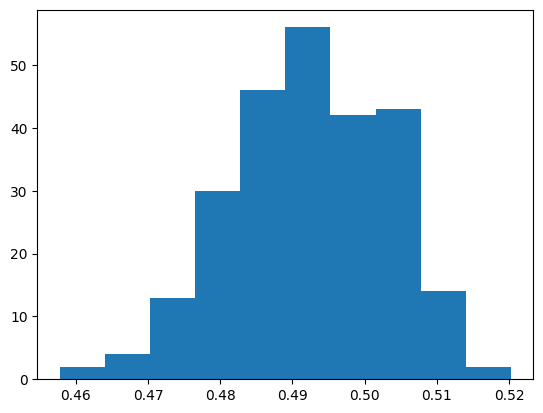

In [57]:
import matplotlib.pyplot as plt

plt.hist(lda_prob[:,0])
plt.show()

2005년 데이터 중에서는 사후 확률이 90%를 초과한 날이 단 하루도 없습니다.
실제로 2005년 전체에서 **시장 하락(Down)**에 대한
최고 사후 확률은 **52.02%**에 불과했습니다.

위에서 사용한 LDA 분류기는 우리가 처음 사용하는
scikit-learn 라이브러리의 분류기(classifier)입니다.
이후 실습에서는 이 라이브러리에서 제공하는 다양한 분류기 객체들을 계속 사용할 예정입니다.

sklearn의 분류기는 일관된 구조를 따르기 때문에
**교차검증(cross-validation)**과 같은 작업을 매우 효율적으로 수행할 수 있습니다.
이 구조는 다음과 같은 순서로 이루어집니다:

1. 모델 생성 (instantiate):
데이터를 참조하지 않고 모델 객체를 먼저 생성합니다.
2. 모델 학습 (fit):
fit() 메서드를 통해 데이터를 모델에 학습시킵니다.
3. 예측 수행 (predict):
predict() 메서드를 사용하여 예측을 수행합니다

## Quadratic Discriminant Analysis
QDA는 sklearn 패키지의 QuadraticDiscriminantAnalysis() 클래스를 통해 구현되며,
이 실습에서는 줄여서 QDA()로 사용합니다.

사용법은 앞서 다룬 LDA()와 거의 동일한 형태를 따릅니다.



In [58]:
# QDA 모델 생성 및 학습 (클래스별 공분산 저장)
qda = QDA(store_covariance=True)
qda.fit(X_train, L_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

QDA() 객체도 LDA와 마찬가지로 다음 두 속성을 제공합니다:

means_: 각 클래스별 평균값

priors_: 각 클래스의 사전 확률

In [59]:
qda.means_, qda.priors_


(array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]),
 array([0.49198397, 0.50801603]))

QDA는 각 클래스별로 별도의 공분산 행렬을 추정합니다.
아래는 **첫 번째 클래스(예: 'Down')**에 대한 공분산 행렬입니다:

In [60]:
qda.covariance_[0]


array([[ 1.50662277, -0.03924806],
       [-0.03924806,  1.53559498]])

QDA는 **비선형 판별 함수(이차식)**를 사용하므로   
LDA처럼 **선형 판별 계수(scalings_)**는 제공하지 않습니다.

QDA에서도 predict() 함수는 LDA와 동일하게 작동합니다:

In [61]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, L_test)


Truth,Down,Up
Predicted,,
Down,30,20
Up,81,121


QDA의 예측 정확도는 약 **60%**로,
모델이 학습에 사용하지 않았던 2005년 데이터에 대해서도 꽤 높은 성능을 보입니다.

이러한 결과는 QDA의 이차 판별 경계가
LDA나 로지스틱 회귀보다 시장 움직임의 비선형적 관계를
더 잘 포착할 수 있다는 가능성을 시사합니다.

In [62]:
np.mean(qda_pred == L_test)


np.float64(0.5992063492063492)

 다만, 주식 시장 데이터는 본질적으로 예측이 매우 어려운 데이터이므로,
이 결과만을 바탕으로 QDA가 항상 우수하다고 단정하긴 어렵습니다.
보다 큰 테스트셋에서 추가적인 검증이 필요합니다.



## Naive Bayes
이번에는 Smarket 데이터에 나이브 베이즈 분류기를 적용해보겠습니다.
사용하는 구문은 LDA()와 QDA()와 매우 비슷합니다.

In [63]:
# Gaussian Naive Bayes 모델 생성 및 학습
NB = GaussianNB()
NB.fit(X_train, L_train)

GaussianNB()

기본적으로 GaussianNB()는 **각 수치형 변수(feature)**를
**정규분포(Gaussian distribution)**로 가정하고 모델링합니다.
필요하다면 커널 밀도 추정(KDE) 방식으로도 확률분포를 추정할 수 있습니다.

In [65]:
print(NB.classes_)         # 클래스 라벨 확인
print(NB.class_prior_)     # 클래스별 사전 확률

['Down' 'Up']
[0.49198397 0.50801603]


예를 들어, Lag1 변수의 Down 클래스 평균은 0.043,
분산은 1.503입니다.

속성 이름이 궁금할 때는 NB? 또는 ?NB를 통해 확인할 수 있습니다.

In [66]:
?NB

In [68]:
print(NB.theta_)     # 평균 (각 행 = 클래스, 각 열 = 변수)
print(NB.var_)       # 분산

[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]
[[1.50355429 1.53246749]
 [1.51401364 1.48732877]]


In [69]:
# 직접 코드로 확인하기
X_train[L_train == 'Down'].mean()


,0
Lag1,0.042790
Lag2,0.033894


분산도 마찬가지입니다.

In [74]:
# 분산 수동 계산 (ddof=0: 모집단 분산)
X_train[L_train == 'Down'].var(ddof=0)


,0
Lag1,1.503554
Lag2,1.532467


예측 및 성능 평가

In [75]:
nb_labels = NB.predict(X_test)
confusion_table(nb_labels, L_test)


Truth,Down,Up
Predicted,,
Down,29,20
Up,82,121


나이브 베이즈는 이 데이터에서 약 59%의 정확도를 보이며,
QDA보다는 약간 낮지만, LDA보다는 훨씬 더 나은 성능을 보입니다.


predict_proba()를 사용하면 각 샘플이
각 클래스에 속할 확률값을 출력할 수 있습니다

In [76]:
# 앞에서 5개 샘플에 대한 사후 확률 출력
NB.predict_proba(X_test)[:5]


array([[0.4873288 , 0.5126712 ],
       [0.47623584, 0.52376416],
       [0.46529531, 0.53470469],
       [0.47484469, 0.52515531],
       [0.49020587, 0.50979413]])

## K-Nearest Neighbors
KNeighborsClassifier()를 사용해 KNN 모델을 학습합니다.
LDA, QDA처럼 fit()으로 학습하고, predict()로 예측합니다.

In [78]:
knn1 = KNeighborsClassifier(n_neighbors=1)

# numpy 배열로 변환
X_train, X_test = [np.asarray(X) for X in [X_train, X_test]]

# 모델 학습 및 예측
knn1.fit(X_train, L_train)
knn1_pred = knn1.predict(X_test)

# 혼동 행렬 출력
confusion_table(knn1_pred, L_test)

Truth,Down,Up
Predicted,,
Down,43,58
Up,68,83


K=1일 때의 성능은 그리 좋지 않습니다.
정확도는 약 **50%**입니다. 이는 과적합(overfitting)의 가능성을 나타냅니다.

In [79]:
(83+43)/252, np.mean(knn1_pred == L_test)


(0.5, np.float64(0.5))

K=3으로 설정하니 약간의 성능 향상이 있으나,
추가적인 K 증가로는 더 이상의 개선이 없습니다.   
**현재의 데이터셋과 분할 기준** 에서는 QDA가 가장 성능이 우수합니다.



In [80]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3_pred = knn3.fit(X_train, L_train).predict(X_test)
np.mean(knn3_pred == L_test)

np.float64(0.5317460317460317)

이번에는 ISLP 라이브러리의 Caravan 데이터를 사용합니다.
이 데이터는 5,822명의 인구통계 변수 85개와,
각 개인이 **캐러밴 보험(Purchase)**을 구매했는지 여부를 담고 있습니다.

In [82]:
# 데이터 불러오기
Caravan = load_data('Caravan')

# 목표 변수 (보험 구매 여부)
Purchase = Caravan.Purchase
Purchase.value_counts()


,count
Purchase,
No,5474
Yes,348


설명 변수만 추출하고 스케일링
KNN은 거리 기반 분류기이므로,
변수들의 **척도(scale)**가 다르면 예측에 큰 영향을 줍니다.
→ 따라서 반드시 **표준화(standardization)**가 필요합니다.

In [83]:
# 목표 변수 제외
feature_df = Caravan.drop(columns=['Purchase'])

# 표준화 설정
scaler = StandardScaler(with_mean=True, with_std=True, copy=True)
scaler.fit(feature_df)
X_std = scaler.transform(feature_df)

# DataFrame으로 변환
feature_std = pd.DataFrame(X_std, columns=feature_df.columns)

# 각 변수의 표준편차 확인 (모두 1에 가까움)
feature_std.std()

,0
MOSTYPE,1.000086
MAANTHUI,1.000086
MGEMOMV,1.000086
MGEMLEEF,1.000086
MOSHOOFD,1.000086
...,...
AZEILPL,1.000086
APLEZIER,1.000086
AFIETS,1.000086
AINBOED,1.000086


⚠️ KNN에서 변수의 스케일(척도)이 중요한 이유
KNN 분류기는 테스트 데이터의 예측을 수행할 때,
가장 가까운 이웃 데이터들을 기준으로 클래스를 결정합니다.
이 과정에서 거리(distance) 계산이 핵심이므로,
**변수의 스케일(크기)**이 예측에 큰 영향을 미치게 됩니다.

즉, 스케일이 큰 변수는 거리 계산에서 훨씬 더 큰 영향력을 가지며,
스케일이 작은 변수는 무시되는 수준이 될 수 있습니다.

예를 들어 어떤 데이터셋에 salary(달러 단위)와 age(년 단위) 변수가 있다고 가정해 봅시다.

KNN 입장에서는 급여가 1,000달러 차이 나는 두 사람은
50세 차이 나는 두 사람보다 훨씬 더 멀다고 판단합니다.

하지만 우리의 직관은 그 반대죠 —
나이 50세 차이는 엄청난 차이이고,
급여 1,000달러는 상대적으로 작다고 느낄 수 있습니다.

이처럼 KNN은 변수 단위(단위 스케일)에 민감하기 때문에,
예를 들어 salary를 일본 엔(JPY)으로 바꾸거나 age를 분(minute) 단위로 바꾸면
모델 예측 결과가 전혀 달라질 수 있습니다.

In [ ]:
scaler = StandardScaler(with_mean=True,
                        with_std=True,
                        copy=True)


표준편차가 정확히 1이 아닌 이유
StandardScaler()로 변환한 후 각 변수의 표준편차를 확인해보면,
정확히 1이 아니라 약간 차이가 나는 경우가 있습니다.

이유는 다음과 같습니다:

StandardScaler()는 분산 계산 시 **$1/n$ (모집단 분산)**을 사용하고,

DataFrame.std()는 **$1/(n-1)$ (표본 분산)**을 사용하기 때문입니다.

하지만 중요한 건 모든 변수들이 동일한 기준(스케일) 위에 있다는 점이며,
조금의 차이는 KNN의 성능에 큰 영향을 주지 않습니다.

학습/테스트 데이터 분할: train_test_split()
이제 전체 데이터를 학습셋과 테스트셋으로 나누겠습니다.

학습 데이터: 대부분의 관측치

테스트 데이터: 1,000개 관측치

In [84]:
# 1,000개 테스트셋, 나머지는 학습셋
(X_train, X_test, y_train, y_test) = train_test_split(
    np.asarray(feature_std), Purchase,
    test_size=1000, random_state=0
)

train_test_split()의 인자 형식
?train_test_split으로 함수 정보를 확인하면,
**(non-keyword arguments)**로는

리스트 (list)

넘파이 배열 (ndarray)

판다스 데이터프레임 (DataFrame) 등
길이(행 개수, shape[0])가 같은 객체들을 받을 수 있다는 걸 알 수 있습니다.

이 예제에서는 feature_std (입력 변수들)와 Purchase (응답 변수)를 인자로 사용합니다

In [87]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1_pred = knn1.fit(X_train, y_train).predict(X_test)

# 테스트 오차율 vs 항상 'No'로 예측했을 때 오차율
np.mean(y_test != knn1_pred), np.mean(y_test != "No")


(np.float64(0.111), np.float64(0.067))

KNN 오차율: 약 11%

항상 'No'라고만 예측할 경우: 약 6% (null rate)

처음 보면 KNN이 꽤 괜찮아 보일 수 있지만,
사실 단순히 **"모두 No로 예측"**만 해도 오차율이 더 낮습니다.



In [88]:
confusion_table(knn1_pred, y_test)


Truth,No,Yes
Predicted,,
No,880,58
Yes,53,9


### Tuning Parameters

K-최근접 이웃(KNN)에서의 **이웃 수(K)**는
튜닝 파라미터(tuning parameter) 또는 **하이퍼파라미터(hyperparameter)**라고 부릅니다.

이 값을 사전에 정확히 알 수는 없기 때문에,
K 값을 다양하게 조정하면서 테스트 데이터에서
예측 성능이 어떻게 달라지는지 살펴보는 것이 중요합니다.

여기서는 for 반복문을 사용하여 K=1부터 K=5까지 변화시켜 가며,
KNN 분류기가 보험을 구매할 것으로 예측한 그룹에서의 정확도를 확인합니

In [89]:
for K in range(1, 6):
    # K값에 따른 KNN 모델 생성 및 예측
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(X_train, y_train).predict(X_test)

    # 혼동 행렬 계산
    C = confusion_table(knn_pred, y_test)

    # 예측된 'Yes'의 수, 실제 'Yes'의 수
    pred = C.loc['Yes'].sum()
    did_buy = C.loc['Yes', 'Yes']

    # 출력 포맷
    templ = ('K={0:d}: 예측된 구매자 수: {1:>2}, '
             '실제 구매자 수: {2:d}, 정확도: {3:.1%}')

    # 결과 출력
    print(templ.format(K, pred, did_buy, did_buy / pred if pred else 0))


K=1: 예측된 구매자 수: 62, 실제 구매자 수: 9, 정확도: 14.5%
K=2: 예측된 구매자 수:  6, 실제 구매자 수: 1, 정확도: 16.7%
K=3: 예측된 구매자 수: 20, 실제 구매자 수: 3, 정확도: 15.0%
K=4: 예측된 구매자 수:  4, 실제 구매자 수: 0, 정확도: 0.0%
K=5: 예측된 구매자 수:  7, 실제 구매자 수: 1, 정확도: 14.3%


우리는 실험 결과에서 일부 K 값에 따라 성능이 크게 달라지는 경향을 확인할 수 있습니다.
예를 들어, K=4일 때의 결과는 다른 K 값들과 매우 다르게 나타날 수 있습니다.

### Comparison to Logistic Regression
비교를 위해, 같은 데이터를 사용하여 로지스틱 회귀(logistic regression) 모델도 학습해보겠습니다.

이 역시 sklearn을 사용하여 구현할 수 있습니다.
다만, sklearn의 LogisticRegression()은 기본적으로
릿지 회귀(ridge regression) 형태의 로지스틱 회귀를 수행합니다.
(정규화에 대한 내용은 Chapter 6에서 자세히 다룹니다.)

이러한 정규화 효과를 제거하고 우리가 알고 있는
일반적인 로지스틱 회귀와 동일한 결과를 얻기 위해서는
C 값을 매우 크게 설정해주면 됩니다.

statsmodels 패키지와는 달리,
sklearn의 분류기는 **모형 요약(summary)**보다는
예측 성능 및 분류 자체에 초점을 맞추고 있습니다.

즉, statsmodels에서 제공되던 summary() 함수나,
우리가 사용했던 summarize() 같은 요약 기능은
sklearn 분류기에서는 기본적으로 제공되지 않습니다.



In [91]:
# 매우 큰 C 값을 사용하여 정규화 효과 제거 + liblinear solver 지정
logit = LogisticRegression(C=1e10, solver='liblinear')
# 기본 solver에서 **수렴 경고(convergence warning)**가 발생하는 것을 방지하기 위함.

# 모델 학습
logit.fit(X_train, y_train)

# 예측 확률 계산
logit_pred = logit.predict_proba(X_test)

# 기본 임계값 0.5 기준으로 라벨 생성
logit_labels = np.where(logit_pred[:, 1] > 0.5, 'Yes', 'No')

# 혼동 행렬 확인
confusion_table(logit_labels, y_test)

Truth,No,Yes
Predicted,,
No,931,67
Yes,2,0


 문제점: 임계값 0.5는 너무 엄격한거같습니다..
위 결과를 보면 0.5를 임계값으로 썼을 때,
보험을 구매할 것이라고 예측한 고객이 단 2명에 불과합니다.

In [92]:
# 임계값 0.25로 낮춰서 더 많은 예측 수행
logit_labels = np.where(logit_pred[:, 1] > 0.25, 'Yes', 'No')
confusion_table(logit_labels, y_test)

Truth,No,Yes
Predicted,,
No,913,58
Yes,20,9


In [ ]:
9/(20+9)


0.3103448275862069

이 예제에서는 Bikeshare 데이터를 이용해
**선형 회귀(Linear Regression)**와 포아송 회귀(Poisson Regression)   
 모델을 학습합니다.
(자세한 내용은 Section~{Ch4:sec:pois} 참고)

종속 변수인 bikers는
2010년부터 2012년까지 워싱턴 D.C.에서 시간당 자전거 대여 수를 나타냅니다.
이를 통해 시간, 날씨 등의 변수와 대여량 간의 관계를 분석할 수 있습니다.



In [93]:
Bike = load_data('Bikeshare')


In [94]:
Bike.shape, Bike.columns


((8645, 15),
 Index(['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
        'registered', 'bikers'],
       dtype='object'))

In [95]:
Bike.head()

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bikers
0,1,Jan,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0,3,13,16
1,1,Jan,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0,8,32,40
2,1,Jan,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0,5,27,32
3,1,Jan,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0,3,10,13
4,1,Jan,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0,0,1,1


### Linear Regression


In [96]:
# 설명 변수 설정
X = MS(['mnth', 'hr', 'workingday', 'temp', 'weathersit']).fit_transform(Bike)
Y = Bike['bikers']

# 선형 회귀 모델 학습
M_lm = sm.OLS(Y, X).fit()
summarize(M_lm)

,coef,std err,t,P>|t|
intercept,-68.6317,5.307,-12.932,0.000
mnth[Feb],6.8452,4.287,1.597,0.110
mnth[March],16.5514,4.301,3.848,0.000
mnth[April],41.4249,4.972,8.331,0.000
mnth[May],72.5571,5.641,12.862,0.000
mnth[June],67.8187,6.544,10.364,0.000
mnth[July],45.3245,7.081,6.401,0.000
mnth[Aug],53.2430,6.640,8.019,0.000
mnth[Sept],66.6783,5.925,11.254,0.000
mnth[Oct],75.8343,4.950,15.319,0.000


데이터에는 hr 변수에 대해 **24개 수준(level)**이 있으며,
전체 데이터는 **총 40개 행(row)**으로 구성되어 있습니다.

선형 회귀 모델 M_lm에서는

hr[0] (0시)

mnth[Jan] (1월)
이 두 값이 **기준 수준(baseline)**으로 처리됩니다.
즉, 이 수준들에 대한 회귀 계수는 명시적으로 제공되지 않으며, 계수는 0으로 간주됩니다.
다른 모든 수준의 계수는 이 기준과의 상대적인 차이를 나타냅니다.

예를 들어:

mnth[Feb]의 계수가 6.845라는 것은
다른 조건이 동일할 때, 2월에는 1월보다 평균 약 7명이 더 많이 자전거를 대여했다는 의미입니다.

mnth[Mar]는 1월보다 약 16.5명 더 많음



#### sum coding?

범주형 변수의 수준(level) 중 하나를 기준으로 두는 것이 아니라,

모든 계수의 합이 0이 되도록 제약을 두는 방식입니다.

따라서 마지막 수준(level)의 계수는 따로 표시되지 않고,
**그 외 모든 계수의 합의 음수(-)**로 계산됩니다.

In [98]:
hr_encode = contrast('hr', 'sum')
mnth_encode = contrast('mnth', 'sum')


Refitting again:

In [101]:
X2 = MS([mnth_encode,
         hr_encode,
        'workingday',
        'temp',
        'weathersit']).fit_transform(Bike)
M2_lm = sm.OLS(Y, X2).fit()
S2 = summarize(M2_lm)
S2

,coef,std err,t,P>|t|
intercept,73.5974,5.132,14.340,0.000
mnth[Jan],-46.0871,4.085,-11.281,0.000
mnth[Feb],-39.2419,3.539,-11.088,0.000
mnth[March],-29.5357,3.155,-9.361,0.000
mnth[April],-4.6622,2.741,-1.701,0.089
mnth[May],26.4700,2.851,9.285,0.000
mnth[June],21.7317,3.465,6.272,0.000
mnth[July],-0.7626,3.908,-0.195,0.845
mnth[Aug],7.1560,3.535,2.024,0.043
mnth[Sept],20.5912,3.046,6.761,0.000


M2_lm 모델은 sum coding을 사용하여 학습된 선형 회귀 모델입니다.
이 방식에서는 다음과 같은 차이가 발생합니다:

hr 변수의 마지막 수준인 hr[23]과
mnth 변수의 마지막 수준인 mnth[Dec]는 계수 값이 출력되지 않습니다.

하지만 해당 계수는 0이 아니라,
**다른 모든 수준의 계수 합의 음수(-)**로 해석됩니다.

coef[Dec] = - (coef[Jan] + coef[Feb] + ... + coef[Nov])   
coef[hr[23]] = - (coef[hr[0]] + ... + coef[hr[22]])

이 말은 곧, hr과 mnth에 대한 모든 계수의 합이 0이 되도록 강제된다는 뜻입니다.   
***→ 따라서 각 계수는 전체 평균 대비 차이값으로 해석할 수 있습니다.***

예를 들어, 다음과 같은 계수가 있다고 할 때:
mnth[Jan] = -46.087   
이는 다른 조건이 동일하다면,   
***1월의 자전거 이용자 수는 연평균보다 약 46명 적다는 의미입니다.   ***

항목	|        Dummy Coding	|Sum Coding   
제외되는 수준	| 기준값(Baseline, 예: Jan)|	마지막 수준 (예: Dec)   
계수 해석 기준|	기준값 대비 차이	|전체 평균 대비 차이   
계수들의 합|	제한 없음	|항상 0이 되도록 강제됨   

In [ ]:
|np.sum((M_lm.fittedvalues - M2_lm.fittedvalues)**2)


1.0334731385542263e-18

실제로 두 인코딩 방식으로 학습한 모델의 예측값은 완전히 동일합니다:

In [106]:
print(np.sum((M_lm.fittedvalues - M2_lm.fittedvalues)**2)) #  0
print(np.allclose(M_lm.fittedvalues, M2_lm.fittedvalues)) # True

# 즉, 해석만 다를 뿐 결과는 동일하며,
# 어떤 인코딩을 쓰더라도 해석을 올바르게 하면 문제가 없다는 것이 핵심입니다.

1.5178478088943298e-20
True


책의 Figure~\ref{Ch4:bikeshare}의 왼쪽 그림을 재현하기 위해,
먼저 월(mnth)에 해당하는 회귀 계수들을 추출해야 합니다.

M2_lm은 sum coding을 사용해 학습되었기 때문에,
mnth[Jan]부터 mnth[Nov]까지의 계수는 모델에서 직접 추출할 수 있습니다.

하지만 mnth[Dec]는 마지막 수준이므로 모델에는 포함되어 있지 않고,
**다른 월의 계수 합의 음수(-)**로 직접 계산해야 합니다.



In [107]:
# 요약 정보에서 'mnth'가 포함된 계수만 선택
coef_month = S2[S2.index.str.contains('mnth')]['coef']
coef_month

,coef
mnth[Jan],-46.0871
mnth[Feb],-39.2419
mnth[March],-29.5357
mnth[April],-4.6622
mnth[May],26.4700
mnth[June],21.7317
mnth[July],-0.7626
mnth[Aug],7.1560
mnth[Sept],20.5912
mnth[Oct],29.7472


sum coding에서는 마지막 수준인 mnth[Dec]의 계수가 모델에 포함되지 않으므로,
직접 계산해야 합니다.

→ 방법: 나머지 11개월 계수의 합에 -1을 곱해 추가

In [108]:
# 월 이름 확인 (순서 유지)
months = Bike['mnth'].dtype.categories

# Dec 계수 추가
coef_month = pd.concat([
    coef_month,
    pd.Series([-coef_month.sum()], index=['mnth[Dec]'])
])

# 결과 확인
coef_month


,0
mnth[Jan],-46.0871
mnth[Feb],-39.2419
mnth[March],-29.5357
mnth[April],-4.6622
mnth[May],26.4700
mnth[June],21.7317
mnth[July],-0.7626
mnth[Aug],7.1560
mnth[Sept],20.5912
mnth[Oct],29.7472


월 이름이 너무 길어지지 않도록,
mnth[Jan], mnth[Feb] 등의 인덱스에서 6번째 문자인 'J', 'F' 등
월의 첫 글자만 추출하여 축 레이블로 사용합니다.

Text(0, 0.5, 'Coefficient')

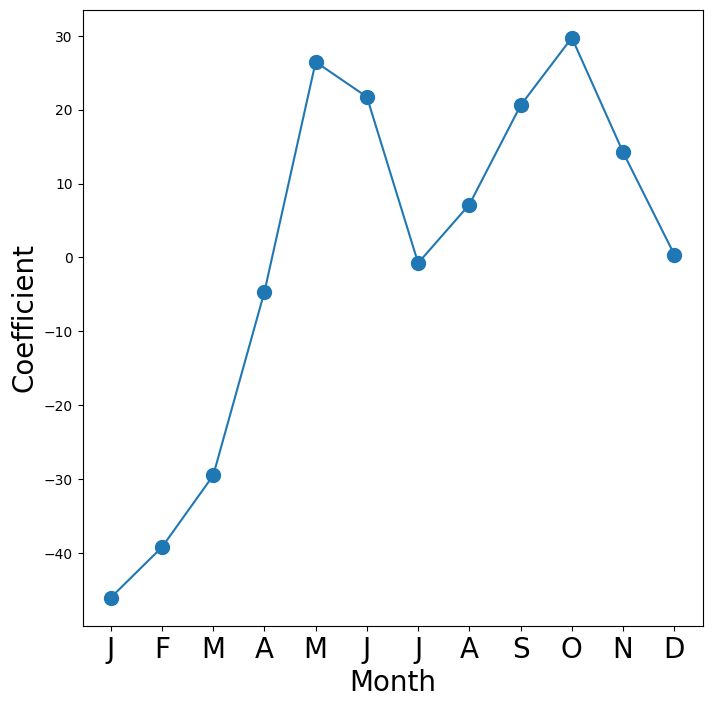

In [109]:
fig_month, ax_month = subplots(figsize=(8, 8))

x_month = np.arange(coef_month.shape[0])
ax_month.plot(x_month, coef_month, marker='o', ms=10)

# x축: 12개월 (레이블은 첫 글자만 표시)
ax_month.set_xticks(x_month)
ax_month.set_xticklabels([l[5] for l in coef_month.index], fontsize=20)

ax_month.set_xlabel('Month', fontsize=20)
ax_month.set_ylabel('Coefficient', fontsize=20)


In [110]:
# hr[0] ~ hr[22] 순서대로 재정렬 + hr[23] 추가
coef_hr = S2[S2.index.str.contains('hr')]['coef']
coef_hr = coef_hr.reindex(['hr[{0}]'.format(h) for h in range(23)])
coef_hr = pd.concat([
    coef_hr,
    pd.Series([-coef_hr.sum()], index=['hr[23]'])
])


Text(0, 0.5, 'Coefficient')

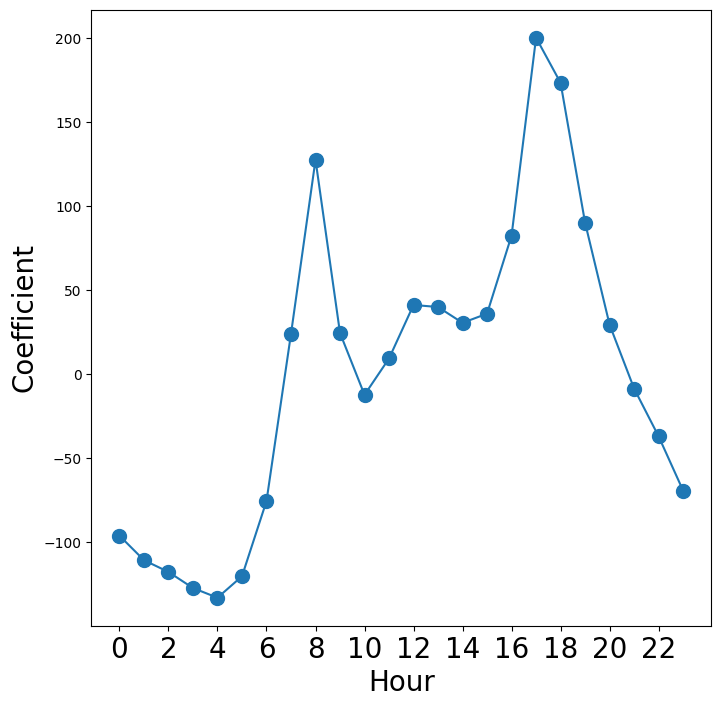

In [111]:
fig_hr, ax_hr = subplots(figsize=(8, 8))

x_hr = np.arange(coef_hr.shape[0])
ax_hr.plot(x_hr, coef_hr, marker='o', ms=10)

# x축: 0시 ~ 23시 중 2시간 간격으로 레이블 표시
ax_hr.set_xticks(x_hr[::2])
ax_hr.set_xticklabels(range(24)[::2], fontsize=20)

ax_hr.set_xlabel('Hour', fontsize=20)
ax_hr.set_ylabel('Coefficient', fontsize=20)


### Poisson Regression

Now we fit instead a Poisson regression model to the
`Bikeshare` data. Very little changes, except that we now use the
function `sm.GLM()` with the Poisson family specified:

In [ ]:
M_pois = sm.GLM(Y, X2, family=sm.families.Poisson()).fit()


We can plot the coefficients associated with `mnth` and `hr`, in order to reproduce  Figure~\ref{Ch4:bikeshare.pois}. We first complete these coefficients as before.

In [ ]:
S_pois = summarize(M_pois)
coef_month = S_pois[S_pois.index.str.contains('mnth')]['coef']
coef_month = pd.concat([coef_month,
                        pd.Series([-coef_month.sum()],
                                   index=['mnth[Dec]'])])
coef_hr = S_pois[S_pois.index.str.contains('hr')]['coef']
coef_hr = pd.concat([coef_hr,
                     pd.Series([-coef_hr.sum()],
                     index=['hr[23]'])])

The plotting is as before.

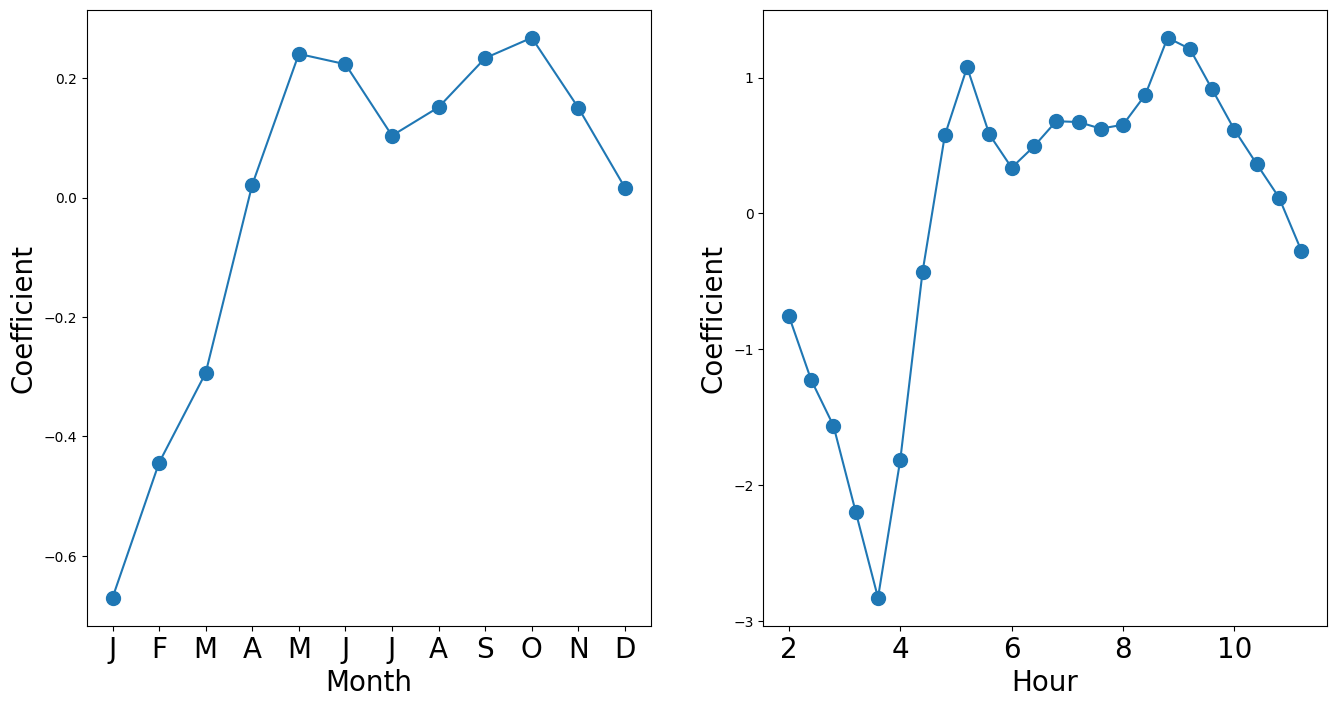

In [ ]:
fig_pois, (ax_month, ax_hr) = subplots(1, 2, figsize=(16,8))
ax_month.plot(x_month, coef_month, marker='o', ms=10)
ax_month.set_xticks(x_month)
ax_month.set_xticklabels([l[5] for l in coef_month.index], fontsize=20)
ax_month.set_xlabel('Month', fontsize=20)
ax_month.set_ylabel('Coefficient', fontsize=20)
ax_hr.plot(x_hr, coef_hr, marker='o', ms=10)
ax_hr.set_xticklabels(range(24)[::2], fontsize=20)
ax_hr.set_xlabel('Hour', fontsize=20)
ax_hr.set_ylabel('Coefficient', fontsize=20);


We compare the fitted values of the two models.
The fitted values are stored in the `fittedvalues` attribute
returned by the `fit()` method for both the linear regression and the Poisson
fits. The linear predictors are stored as the attribute `lin_pred`.

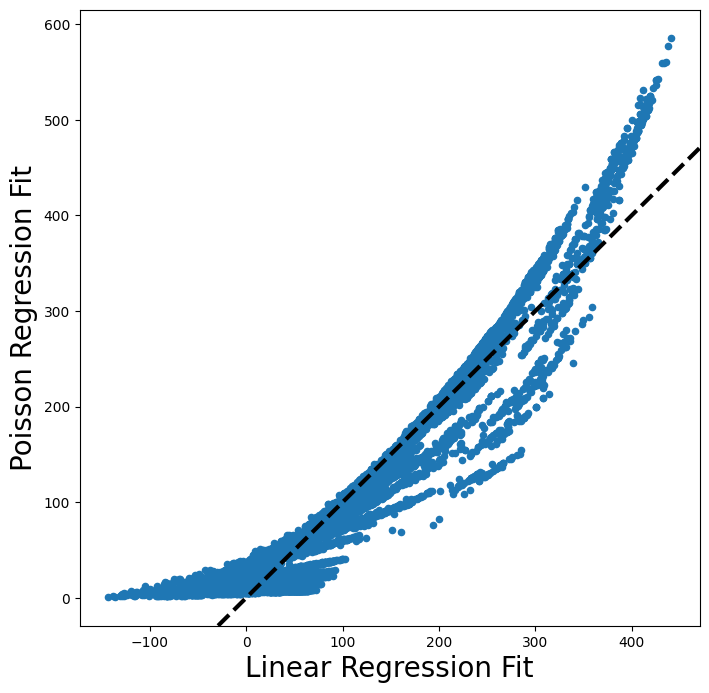

In [ ]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(M2_lm.fittedvalues,
           M_pois.fittedvalues,
           s=20)
ax.set_xlabel('Linear Regression Fit', fontsize=20)
ax.set_ylabel('Poisson Regression Fit', fontsize=20)
ax.axline([0,0], c='black', linewidth=3,
          linestyle='--', slope=1);


The predictions from the Poisson regression model are correlated with
those from the linear model; however, the former are non-negative. As
a result the Poisson regression predictions tend to be larger than
those from the linear model for either very low or very high levels of
ridership.

In this section, we fit Poisson regression models using the `sm.GLM()` function with the argument
`family=sm.families.Poisson()`. Earlier in this lab we used the `sm.GLM()` function
with `family=sm.families.Binomial()` to perform logistic regression. Other
choices for the `family` argument can be used to fit other types
of GLMs. For instance, `family=sm.families.Gamma()` fits a Gamma regression
model.

